In [1]:
import pandas as pd

In [2]:
file = pd.read_csv("data/cleaned_joint.csv",index_col=0)
file.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,No_of_Votes,range,revenue,budget,justified_revenue
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,1990s,28341469,25000000,28.341469
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1970s,245066411,6000000,245.066411
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,2000s,1004558444,185000000,1004.558444
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,1970s,47542841,13000000,47.542841
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,1950s,1000000,350000,1.000000


In [3]:
def func(genre):
    return genre.split(",")

file["split_genre"] = file["Genre"].apply(str.split,args=",")

In [4]:
file.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,No_of_Votes,range,revenue,budget,justified_revenue,split_genre
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,1990s,28341469,25000000,28.341469,[Drama]
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1970s,245066411,6000000,245.066411,"[Crime, Drama]"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,2000s,1004558444,185000000,1004.558444,"[Action, Crime, Drama]"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,1970s,47542841,13000000,47.542841,"[Crime, Drama]"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,1950s,1000000,350000,1.000000,"[Crime, Drama]"


In [5]:
# reference: https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = file.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(file.pop('split_genre')),
                index=file.index,
                columns=mlb.classes_))
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,...,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Horror,Mystery,Western
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,...,0,0,0,0,0,1,0,0,0,0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,...,0,0,0,0,1,0,0,0,0,0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,...,0,0,0,0,1,0,0,0,0,0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,...,0,0,0,0,1,0,0,0,0,0


In [6]:
df_genres = df.drop(columns=['Series_Title', 'Runtime', 'Genre', 'IMDB_Rating',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'range',
       'revenue', 'budget', 'justified_revenue'],axis=1)

In [7]:
df_genres

,Released_Year,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Horror,Mystery,Western
0,1994,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1972,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2008,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1974,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1957,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1979,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,1977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
439,1967,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
440,1964,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
df_group = df_genres.groupby("Released_Year").sum()
df_group

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,...,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Horror,Mystery,Western
Released_Year,,,,,,,,,,,,,,,,,,,,,
1921,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1933,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1936,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0,1,2,2,2,8,0,2,0,1,...,3,0,4,1,1,4,0,0,0,0
2014,3,8,0,2,1,5,0,0,0,0,...,2,3,2,0,1,5,0,0,0,0
2015,0,3,0,2,2,7,0,0,0,2,...,1,1,3,0,1,3,0,0,0,0


In [9]:
df_group.columns

Index([' Action', ' Adventure', ' Biography', ' Comedy', ' Crime', ' Drama',
       ' Family', ' Fantasy', ' Film-Noir', ' History', ' Horror', ' Music',
       ' Musical', ' Mystery', ' Romance', ' Sci-Fi', ' Sport', ' Thriller',
       ' War', ' Western', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Horror', 'Mystery', 'Western'],
      dtype='object')

In [10]:
df_test = df_group.reset_index()
df_test

,Released_Year,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Horror,Mystery,Western
0,1921,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1927,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1933,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1934,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1936,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2013,0,1,2,2,2,8,0,2,0,...,3,0,4,1,1,4,0,0,0,0
73,2014,3,8,0,2,1,5,0,0,0,...,2,3,2,0,1,5,0,0,0,0
74,2015,0,3,0,2,2,7,0,0,0,...,1,1,3,0,1,3,0,0,0,0
75,2016,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
columns = [i.strip() for i in list(df_test.columns)]
df_test.columns = columns
df_test = df_test.groupby(df_test.columns, axis=1).sum()
df_test = df_test[['Released_Year','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western']]
columns = df_test.columns

In [12]:
# df_final = pd.DataFrame(columns=["Released_Year","Genre"])
dic = {"Released_Year":[],"Genre":[]}

for colname in columns[1:]:

    df_slice = df_test[["Released_Year",colname]]

    def func(year, genre_number):
        print(year,genre_number)

        if genre_number > 0:
            for i in range(genre_number):
               dic["Released_Year"].append(year)
               dic["Genre"].append(colname)

    for ind in df_slice.index:
        func(df_slice["Released_Year"][ind],df_slice[colname][ind])

1921 0
1927 0
1933 0
1934 0
1936 0
1939 0
1940 0
1942 0
1945 0
1946 0
1948 1
1951 0
1952 0
1953 0
1954 0
1955 0
1957 0
1958 0
1959 0
1960 0
1961 0
1962 1
1963 0
1964 1
1965 0
1966 0
1967 0
1968 0
1969 1
1970 0
1971 1
1972 0
1973 0
1974 0
1975 0
1976 0
1977 1
1978 1
1979 1
1980 1
1981 1
1982 3
1983 0
1984 2
1985 0
1986 1
1987 2
1988 2
1989 1
1990 0
1991 1
1992 1
1993 3
1994 0
1995 1
1996 0
1997 2
1998 1
1999 3
2000 1
2001 1
2002 4
2003 4
2004 4
2005 4
2006 5
2007 4
2008 3
2009 6
2010 3
2011 1
2012 4
2013 2
2014 8
2015 3
2016 2
2019 0
1921 0
1927 0
1933 1
1934 0
1936 0
1939 1
1940 0
1942 0
1945 0
1946 0
1948 1
1951 0
1952 0
1953 0
1954 0
1955 0
1957 1
1958 0
1959 1
1960 0
1961 0
1962 1
1963 1
1964 1
1965 0
1966 0
1967 1
1968 2
1969 1
1970 0
1971 0
1972 0
1973 0
1974 0
1975 3
1976 0
1977 1
1978 1
1979 1
1980 1
1981 2
1982 2
1983 1
1984 0
1985 1
1986 2
1987 2
1988 0
1989 2
1990 1
1991 0
1992 2
1993 1
1994 1
1995 2
1996 0
1997 1
1998 2
1999 2
2000 4
2001 3
2002 2
2003 4
2004 2
2005 3
2006 5

In [13]:
df_final = pd.DataFrame(dic, columns=["Released_Year","Genre"])

In [14]:
def func(year):
    if year in range(1920,1930):
        return "1920s"
    elif year in range(1930,1940):
        return "1930s"
    elif year in range(1940,1950):
        return "1940s"
    elif year in range(1950,1960):
        return "1950s"
    elif year in range(1960,1970):
        return "1960s"
    elif year in range(1970,1980):
        return "1970s"
    elif year in range(1980,1990):
        return "1980s"
    elif year in range(1990,2000):
        return "1990s"
    elif year in range(2000,2010):
        return "2000s"
    elif year in range(2010,2020):
        return "2010s"
    elif year == 2020:
        return "2020"

df_final["range"] = df_final["Released_Year"].apply(func)

In [15]:
df_final

,Released_Year,Genre,range
0,1948,Action,1940s
1,1962,Action,1960s
2,1964,Action,1960s
3,1969,Action,1960s
4,1971,Action,1970s
...,...,...,...
1127,1974,Western,1970s
1128,1990,Western,1990s
1129,1992,Western,1990s
1130,2010,Western,2010s


In [16]:
df_final.to_csv("data/genre_use.csv")

<AxesSubplot:xlabel='Released_Year'>

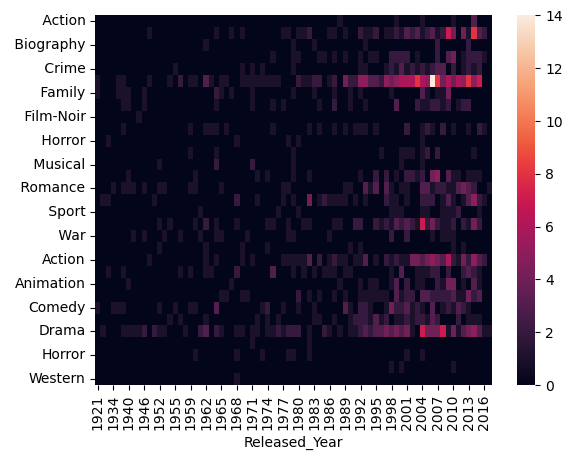

In [21]:
import seaborn as sns
sns.heatmap(df_group.transpose())